# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [74]:
%%capture

!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image geopy

## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

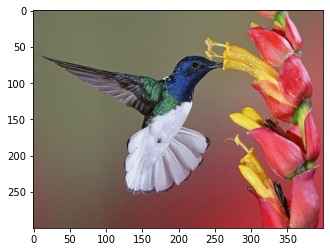

In [75]:
%matplotlib inline
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

img = imread("data/bird.jpg")
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [76]:
img = img_as_float(img)

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [77]:
old_shape = img.shape
img = np.vstack(img)

### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [82]:
n = 20
kmeans = KMeans(n_clusters=n, random_state=10)

In [83]:
%%time
kmeans.fit(img)

Wall time: 16.1 s


KMeans(n_clusters=20, random_state=10)

### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

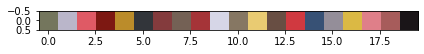

In [84]:
clusters = kmeans.cluster_centers_.reshape(-1, n, 3)
imshow(clusters)

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

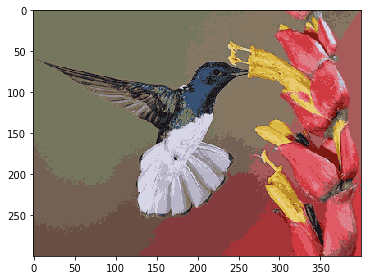

In [85]:
new_img = img.copy()
for label in np.unique(kmeans.labels_):
    new_img[kmeans.labels_ == label] = clusters[0][label]
imshow(new_img.reshape(old_shape))

По итогу собрала всё в одну функцию:

In [97]:
%matplotlib inline
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


def reduce_colors(img: np.ndarray, n: int=10, random_state=42, show=False): 
    
    '''
    img - исходное двумерное RGB изображение
    n - количество цветов в итоговом изображении
    random_state - состояние рандомайзера для k-means
    show - нужно ли выводить исходное и итоговое изображение
    возвращает новое изображение из n цветов, не изменяя исходное
    '''
    
    old_shape = img.shape
    
    new_img = img_as_float(img.copy())
    new_img = np.vstack(new_img)
    
    kmeans = KMeans(n_clusters=n, random_state=random_state).fit(new_img)
    clusters = kmeans.cluster_centers_.reshape(-1, n, 3)
    for label in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == label] = clusters[0][label]
        
    new_img = new_img.reshape(old_shape)
    
    if show:
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))
        axes[0].imshow(img)
        axes[0].set_title('Исходное изображение')
        axes[1].imshow(new_img)
        axes[1].set_title('Получившееся изображение')
    
    return new_img

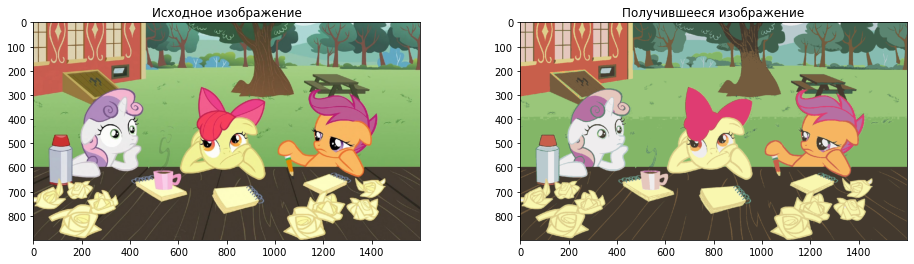

In [151]:
result = reduce_colors(img=imread("data/pony.jpg"), n=16, show=True)

In [149]:
from hashlib import sha256

def hashed(arr):
    string = ' '.join(list(map(str, arr)))
    hashed_string = sha256(string.encode('utf-8')).hexdigest()
    return hashed_string

def count_colors(img: np.ndarray):  # работает смерть как долго, зато правильно. Считает количество уникальных цветов
    s = set()
    for i in img:
        for j in i:
            s.add(hashed(j))
    return len(s)

In [152]:
count_colors(result)

16

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 жлементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

In [153]:
import pandas as pd

In [161]:
offices = {'Los Angeles': [33.751277, -118.188740],
            'Miami': [25.867736, -80.324116],
            'London': [51.503016, -0.075479],
            'Amsterdam': [52.378894, 4.885084],
            'Beijing': [39.366487, 117.036146],
            'Sydney': [-33.868457, 151.205134]}
df_offices = pd.DataFrame(offices, index=['latitude', 'longitude']).T

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [156]:
df = pd.read_csv('data/checkins.csv.gz', compression='gzip')
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [157]:
df.describecribe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [301]:
%%time

from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bandwidth=0.1)
ms.fit(df)

Wall time: 8min 59s


MeanShift(bandwidth=0.1)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

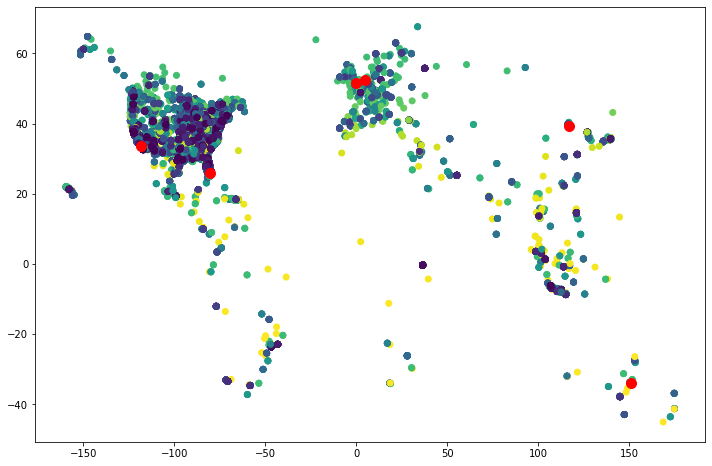

In [302]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=ms.labels_)
plt.scatter(df_offices['longitude'], df_offices['latitude'], s=100, c='red')

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [303]:
final_labels_centers = {}
for label, center in zip(ms.labels_, ms.cluster_centers_):
    if len(df[labels == label]) > 15:
        final_labels_centers[label] = center
len(final_labels_centers)

393

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [304]:
from geopy.distance import geodesic as dist


distances = []
for center in final_labels_centers.values():
    for office_center in offices.values():
        distances.append((center, dist(center, office_center)))
        
answer = []
for item in sorted(distances, key = lambda para: para[1])[:20]:
    answer.append(item[0])
    
answer = pd.DataFrame(answer)

In [306]:
answer

,0,1
0,51.506479,-0.365177
1,52.273818,5.164343
2,39.121079,117.214389
3,52.156651,5.388438
4,52.787747,4.797934
5,33.361463,-118.439676
6,34.164183,-118.826450
7,39.904214,116.407413
8,33.675339,-117.304046
9,33.376420,-117.251147


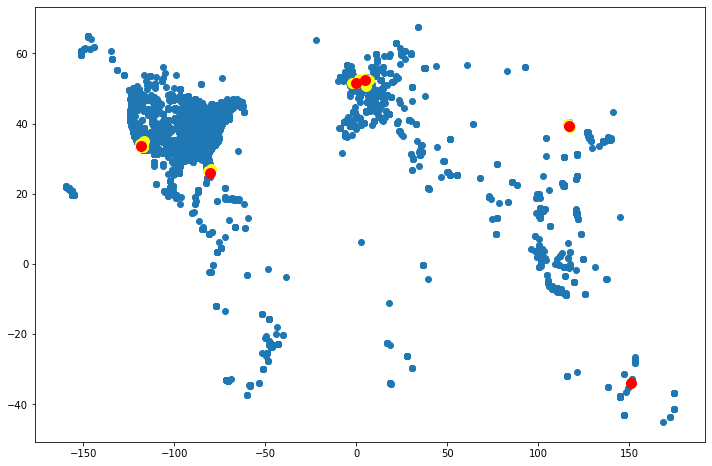

In [305]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'])
plt.scatter(answer[1], answer[0], s=100, c='yellow')
plt.scatter(df_offices['longitude'], df_offices['latitude'], s=100, c='red')

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 